## 1. 파이토치 패키지의 기본 구성
- torch
    - 메인 네임스페이스, 텐서 등 다양한 수학 함수 포함, Numpy와 유사한 구조
- torch.autograd
    - 자동 미분을 위한 함수들이 포함, 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad), 미분 가능 함수를 정의하는 Function 등이 포함되어 있다.
- torch.nn
    - 신경망 구축을 위한 다양한 데이터 구조나 레이어등이 정의됨 ,ex) RNN, LSTM, ReLU, MSELoss
- torch.optim
    - 확률적 경사 하강법(SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어 있다.
- torch.utils.data
    - SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함
- torch.onnx
    - ONNX(Open Neural Network Exchange)의 포맷으로 모델을 export할 때 사용한다. ONNX는 다른 딥 러닝 프레임워크 간에 모델 공유 시 사용하는 포맷

## 2. 텐서 조작하기

### 넘파이로 텐서 만드릭(벡터와 행렬 만들기)

In [1]:
import numpy as np

In [2]:
# 1) 1D with Numpy
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


In [4]:
# 2D with Numpy
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [5]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


### 파이토치로 텐서 선언하기

In [6]:
import torch
#)1D with PyTorch
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [7]:
print(t.dim())
print(t.shape)
print(t.size())

1
torch.Size([7])
torch.Size([7])


In [8]:
#)2D with PyTorch
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [9]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


### 브로드캐스팅(Broadcasting)
- 자동으로 크기를 맞춰서 연산을 수행하게 해준다.

In [10]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [11]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


### 자주 사용되는 기능들

In [78]:
#행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print(m1)
print(m2)
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [13]:
# 평균
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [14]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean(dim=0)) # 행 차원 제거의 의미
print(t.mean(dim=1)) # 열 차원 제거의 의미
print(t.mean(dim=-1)) # 마지막 차원을 제거한다는 의미, 즉 열의 차원을 제거

tensor([[1., 2.],
        [3., 4.]])
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [15]:
# 3) 덧셈 덧셈은 평균과 연산 방법이나 인자가 의미하는 바와 동일하다.
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [16]:
# 4) 최대(Max)와 아그맥스(ArgMax)
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.max()) # Returns one value: max
print(t.max(dim=0)) # Returns two values: max and argmax
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


### 뷰(view) - 원소의 수를 유지하면서 텐서의 크기 변경! - 매우 중요함

In [17]:
t = np.array([[[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8],
              [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.]]])


In [18]:
print(ft.shape)

torch.Size([1, 4, 3])


In [19]:
torch.Size([2, 2, 3])

torch.Size([2, 2, 3])

In [20]:
print(ft.view([-1,3]))
print(ft.view([-1, 3]).shape) # -1은 첫번째 차원은 파이토치가 알아서 맞춰준다는 의미를 갖고 있다.

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


### view 규칙
- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.
- 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.


In [21]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [22]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [23]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [24]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [25]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape) #인덱스는 0부터 시작, 첫번째 차원에 1인 차원 추가

#같은 변환을 view로도 구현 가능
print(ft.view(1, -1)) 
print(ft.view(1, -1).shape)  #위와 같은 결과가 출력됨을 알 수 있다.

tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [26]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

# 인자에 -1을 넣어도 같은 결과가 출력된다.
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


###  타입 캐스팅(Type Casting)
- torch.FloatTensor : 32 bit의 부동 소수점
- torch.LongTensor : 64 bit의 부호있는 정수
- torch.cuda.FloatTensor : GPU 연산을 위한 자료형

In [27]:
lt = torch.LongTensor([1, 2, 3, 4,])
print(lt)

tensor([1, 2, 3, 4])


In [28]:
print(lt.float()) #float형으로 타입이 변경된다.

tensor([1., 2., 3., 4.])


In [29]:
bt = torch.ByteTensor([True, False, True, False])
print(bt)
print(bt.long())
print(bt.float())

tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([1, 0, 1, 0])
tensor([1., 0., 1., 0.])


### 연결하기(concatenate - 두가지의 정보를 모두 사용한다는 의미

In [30]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(torch.cat([x, y], dim =0)) # 첫번쨰 차원을 늘려 연결한다. (2,2) -> (4,2)
print(torch.cat([x, y], dim =1)) # 두 번째 차원을 늘려 연결한다. (2,2) -> (2,4)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 스택킹(Stacking)

In [31]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6 ])
print(torch.stack([x, y, z]))

#stck으로는 간단히 계산되지만 사실은 아래와 같은 연산과정을 거친다.
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

print(torch.stack([x, y, z], dim = 1)) # 두 번째 차원이 증가하도록 스택킹 된 결과를 보여준다.

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


### ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [32]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)
print(torch.ones_like(x)) # 동일한 크기(shape)를 가지지만 값이 1로만 채워진 텐서가 생성된다.
print(torch.zeros_like(x)) # 동일한 크기(shpe)를 가지지만 값이 0으로 채워진 텐서가 생성된다.

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### In-place Operation (덮어쓰기 연산)

In [33]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) #곱하기 2를 한 결과 출력
print(x)

print(x.mul_(2.)) # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) #기존의 값 출력이도는데 연산 결과가 저장됨을 확인 할 수 있다

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


## 3. 파이썬 클래스(class)

### 함수(function)과 클래스(class)의 차이

- 함수(function)로 덧셈기 구현하기

In [34]:
result = 0 #전역변수 선언
def add(num):
    global result
    result += num
    return result

In [35]:
print(add(3))
print(add(4))

3
7


- 함수(function)로 두 개의 덧셈기 구현하기

In [36]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


- 클래스(class)로 덧셈기 구현하기

In [37]:
class Calculator:
    def __init__(self): #객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
         self.result = 0
    def add(self, num): # 객체 생성 후 사용할 수 있는 함수
        self.result += num
        return self.result


In [38]:
cal1 = Calculator()

In [39]:
cal2 = Calculator()

In [40]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


## 4. 선형 회귀(Linear Regreesion)
- 데이터에 대한 이해(Data Definition)
- 가설(Hypothesis) 수립
- 손실 계산하기(Compute loss)
- 경사 하강법 (Gradient Descent)



### 훈련 데이터셋의 구성

In [41]:
# x_train : 공부한 시간 , y_train : 맵핑되는 점수
x_train = torch.FloatTensor([[1], [2], [3]])#2차원 tensor 생성
y_train = torch.FloatTensor([[2], [4], [6]]) #

### 가설(Hypothesis) 수립
- 선형 회귀의 가설 : H(x) = W * x + b, W : 가중치(Weight), b : 편향(bias)

### 비용 함수(Cost Function)에 대한 이해
- 비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)
- 선형 회귀의 손실 함수 - 평균 제곱 오차 (MSE)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>c</mi>
  <mi>o</mi>
  <mi>s</mi>
  <mi>t</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mo>,</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <msup>
        <mi>y</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo>&#x2212;</mo>
      <mi>H</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo stretchy="false">)</mo>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
    <mn>2</mn>
  </msup>
</math>

### 옵티마이저 - 경사 하강법(Gradient Descent)
- 앞서 정의한 비용 함수(cost function)의 값을 최소로 하는 W와 b를 찾는 방법
- 이 때, 사용되는 것이 옵티마이저(Optimizer) 알고리즘이다. 최적화 알고리즘이라고도 부른다.
- 가장 기본적인 옵티마이저 알고리즘 중 하나가 경사하강법이다.

### 파이토치로 선형 회귀 구현하기

- 1. 기본 셋팅

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

- 변수 선언

In [43]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[4],[5],[6]])
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[4.],
        [5.],
        [6.]])
torch.Size([3, 1])


- 가중치와 편향의 초기화

In [44]:
#가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시
W = torch.zeros(1, requires_grad = True) #requires_grad = True 학습을 통해 변경되는 변수임을 명시
#가중치 W를 출력
print(W)
print(W.shape)

tensor([0.], requires_grad=True)
torch.Size([1])


In [45]:
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


- 가설 세우기

In [46]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


- 비용 함수 선언하기

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>c</mi>
  <mi>o</mi>
  <mi>s</mi>
  <mi>t</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mo>,</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <msup>
        <mi>y</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo>&#x2212;</mo>
      <mi>H</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo stretchy="false">)</mo>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
    <mn>2</mn>
  </msup>
</math>

In [47]:
#앞서 배운 torch.mean으로 평균을 구한다
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(25.6667, grad_fn=<MeanBackward0>)


- 경사 하강법 구현하기 (SGD)

In [48]:
optimizer = optim.SGD([W, b], lr = 0.01)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [49]:
#gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

- 전체 코드

In [50]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 경사하강법의 반복 횟수
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # 비용함수(cost function) 계산 - MSE
    cost = torch.mean((hypothesis - y_train) **2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))
#결과적으로 W는 2, b는 0으로 수렴도미을 알 수 있었다.

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

### optimizer.zero_grad()가 필요한 이유
- 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시킨는 특징이 있습니다.

In [51]:
import torch
w = torch.tensor(2.0, requires_grad = True) #requires_grad : 텐서가 자동 미분을 지원하는 기능을 가짐

nb_epochs = 20
for epoch in range(nb_epochs + 1):
   
    z = 2 * w
    
    z.backward()
    print('수식을 w로 미분한 값 : {}'.format(w.grad))

#결과를 보면 계속 미분 값이 2가 누적이 되는 것을 알 수 있고 이로 인해 발생할 문제를 방지해야한다.

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


### torch.manual_seed()를 하는 이유 : 난수 발생 순서와 값을 동일하게 만들어 실행시 동일한 결과 도출 가능

### 자동 미분 (Autograd)
- 경사하강법 : 비용 함수를 미분하여 함수의 기울기를 구한 후 비용이 최소화 되는 알고리즘
- 이 과정에서 미분 계산을 자동화 해주는 기능을 말한다.

In [52]:
# 자동 미분(Autograd) 실습하기
import torch

w = torch.tensor(2.0, requires_grad =True)

y = w ** 2
z = 2 *y + 5 #  2차함수의 일종
z.backward() # 해당 수식의 w 에 대한 기울기를 계산

print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


## 다중 선형 회귀(Multivariable Linear regression)

- 데이터에 대한 이해
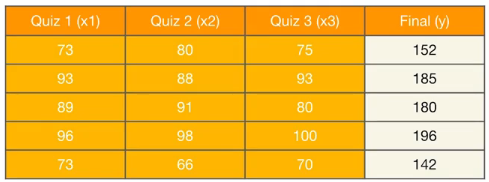
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>w</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>3</mn>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>3</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <mi>b</mi>
</math>

- 파이토치로 구현하기

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [54]:
torch.manual_seed(1)

In [55]:
# 훈련 데이터 
#선형 회귀와는 다르게 변수가 3개이다.
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [56]:
# 가중치 w와 편향 b 초기화
# 변수 갯수와 가중치 갯수는 일치하여야 한다.(3개)
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [68]:
optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)

nb_epochs = 1000
for eopch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    # cost 계산 (MSE)
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

###  벡터와 행렬 연산으로 바꾸기
- 변수의 갯수가 기하급수적으로 증가시에 일일히 선언하는 건 비효율적 
- 벡터의 내적(Dot Product)를 이용해서 사용

### 행렬 연산을 고려하여 파이토치로 구현하기

In [71]:
#x_train을 3개나 설정하지 않고 하나에 모든 샘플을 선언한다.
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [74]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [76]:
#x_train과 w를 곱하고 이에 가중치 연산을 간단히 설정 가능
hypothesis = x_train.matmul(W) + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [81]:
#다중 선형 회귀 전체 코드
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp